In [5]:
#### This code is for ATOC7500 project 5 part II
#import modules
import numpy as np   #for calculations
import matplotlib.pyplot as plt  #for plotting
%matplotlib inline  
import pandas as pd  #for reading in data
import collections  #for additional dictionary functionality
from matplotlib.gridspec import GridSpec #for subplots
import scipy.signal as sig #for signal processing
import scipy.stats as stats

In [35]:
def create_normalized_redfit(data_length,Te):
    freq = np.arange(0,(data_length/2)+1,1)/float(data_length) # to Nyquist
    red_fit = (2 * Te)/(1 + ((2*np.pi*freq)**2)*(Te**2)) # After Hartmann 6.64, 6.91
    return red_fit/np.sum(red_fit)
def create_f_bounds(alpha,dof,red_fit_n):
    f_ratio = stats.f.ppf(alpha,dof,200) # Note: 200 = large degree of freedom for red noise
    return f_ratio*red_fit_n

In [36]:
## read in data
filename = 'homework5_data.csv'
data_file=pd.read_csv(filename,sep=',')
data_origin=data_file['MF6']
data_anom=data_origin-np.mean(data_origin)

lag-1 autocorrelation= 0.34 and Te = 0.93 hours
   


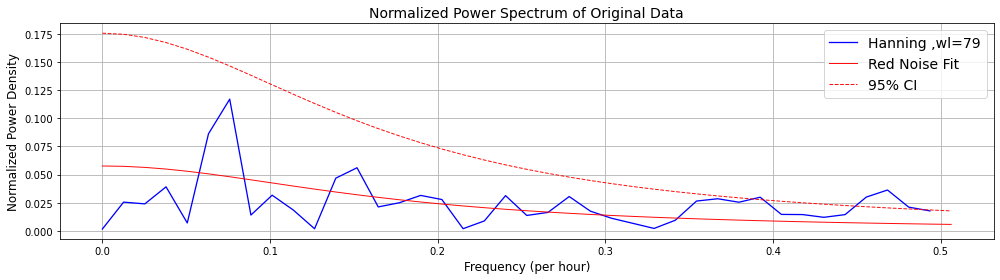

In [42]:
## get power spectrum of original data anomally
rho,lag1 = stats.pearsonr(data_anom[0:len(data_anom)-1],data_anom[1:len(data_anom)])
Te = -1./np.log(rho) # After Hartmann 6.4 with delta t = 1
print('lag-1 autocorrelation=',round(rho,2),'and Te =',round(Te,2),'hours')
print('   ')

# get power spectra
window_length=len(data_anom)
T2 = window_length/2
freq_w = np.arange(0.,T2+1.)/window_length
P_welch = sig.welch(data_anom,window='hanning',nperseg=window_length);
P_welch_n = P_welch[1]/np.sum(P_welch[1])  #normalize

## Construct the expected rednoise spectrum - functions
## Need to update the 95% confidence interval
alpha = 0.95
red_fit_n_welch = create_normalized_redfit(window_length,Te)  ## generate red_fit_n using window_length
dof_welch=len(data_anom)/(window_length/2)  ### Barnes Eq. 26
f_bounds_welch = create_f_bounds(alpha,dof_welch,red_fit_n_welch)  ## f-test for variance; 

## plot
fig = plt.figure(figsize=(14,4))
plt.xlabel('Frequency (per hour)',fontsize=12)
plt.ylabel('Normalized Power Density',fontsize=12)
plt.grid()
plt.plot(freq_w[0:40],P_welch_n, color='blue', lw=1.3, label='Hanning ,wl='+str(window_length));
plt.plot(freq_w,red_fit_n_welch, color='red', lw=1, alpha=0.95, label='Red Noise Fit');
plt.plot(freq_w,f_bounds_welch, color='red', lw=1, ls='--', alpha=0.95, label=str(int(alpha*100))+'% CI');
plt.title('Normalized Power Spectrum of Original Data',fontsize=14);
plt.legend(loc='upper right',fontsize=14)
fig.tight_layout()

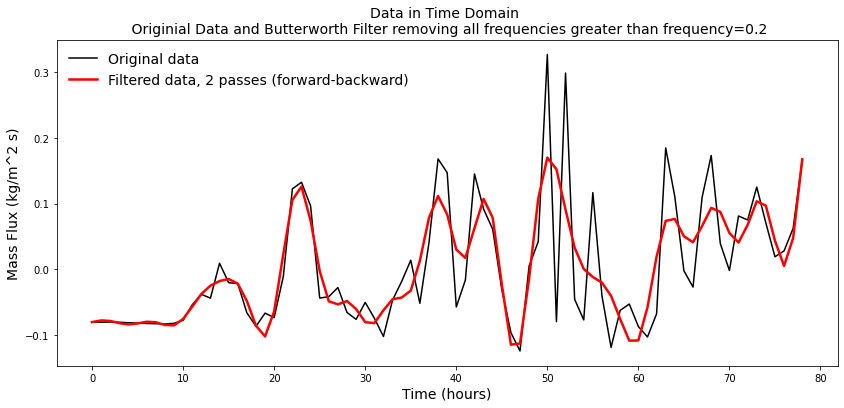

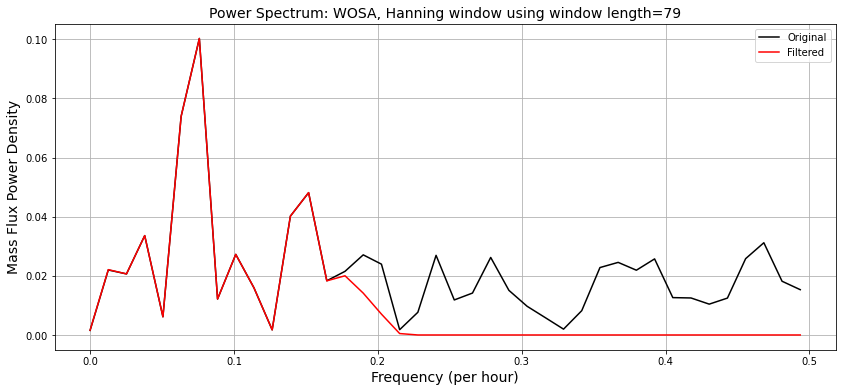

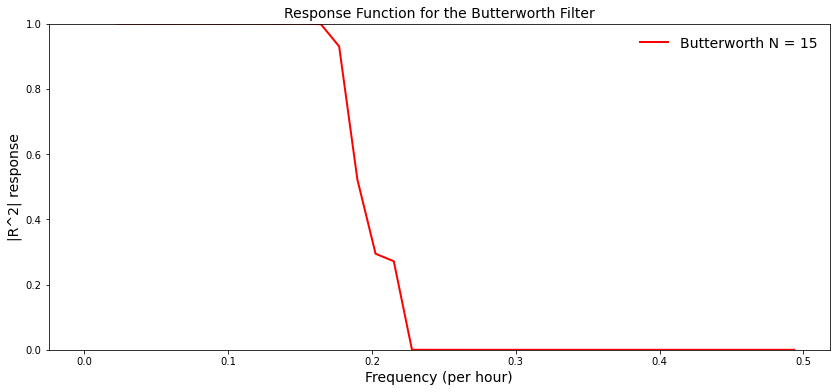

In [38]:
## Apply a Butterworth filter with N=9 (number of weights equal to 9) to remove frequencies greater than 0.05 per year 
frequency_cutoff=0.2
N = 15 ## order
Wn = frequency_cutoff*2 ## scalar given the critical frequency (all higher frequencies are removed)
## Note: Wn is normalized from 0 to 1, where 1 is the Nyquist frequency, pi radians/sample. 
## Note: (Wn is thus in half-cycles / sample.) 
b, a = sig.butter(N, Wn)
y = sig.filtfilt(b,a,data_anom) ## one filter forward, one filter backward

### Calculate the power spectra - Hanning Window and WOSA (Welch’s Overlapping Segment Analysis)
P_welch_filt = sig.welch(y,window='hanning',nperseg=window_length);

### Calculate the response function of the butterworth filter using the convolution theorem
R2_bw=P_welch_filt[1]/P_welch[1]

## plot
fig = plt.figure(figsize=(14,6))
plt.xlabel('Time (hours)',fontsize=14)
plt.ylabel('Mass Flux (kg/m^2 s)',fontsize=14)
plt.plot(data_anom,'-k',linewidth = 1.5, label = 'Original data');
plt.plot(y,'-r',linewidth = 2.5, label = 'Filtered data, 2 passes (forward-backward)');
plt.title('Data in Time Domain \n Originial Data and Butterworth Filter removing all frequencies greater than frequency='+str(frequency_cutoff),fontsize=14)
plt.legend(frameon = False,fontsize = 14,loc='upper left')


fig = plt.figure(figsize=(14,6))
plt.xlabel('Frequency (per hour)',fontsize=14)
plt.ylabel('Mass Flux Power Density',fontsize=14) 
plt.grid()
plt.plot(freq_w[0:40],P_welch[1],'-k',lw=1.5, label='Original');
plt.plot(freq_w[0:40],P_welch_filt[1],'-r',lw=1.5, label='Filtered');
plt.legend(loc='upper right')
plt.title("Power Spectrum: WOSA, Hanning window using window length="+str(window_length),fontsize=14);

fig = plt.figure(figsize=(14,6))
plt.plot(freq_w[0:40],R2_bw,'-r',linewidth = 2, label = 'Butterworth N = '+str(N));
plt.xlabel('Frequency (per hour)',fontsize=14);
plt.ylabel('|R^2| response',fontsize=14);
plt.legend(fontsize = 14, frameon = False);
plt.title('Response Function for the Butterworth Filter',fontsize=14)
plt.ylim(0.0,1.0);


lag-1 autocorrelation= 0.83 and Te = 5.54 hours
   


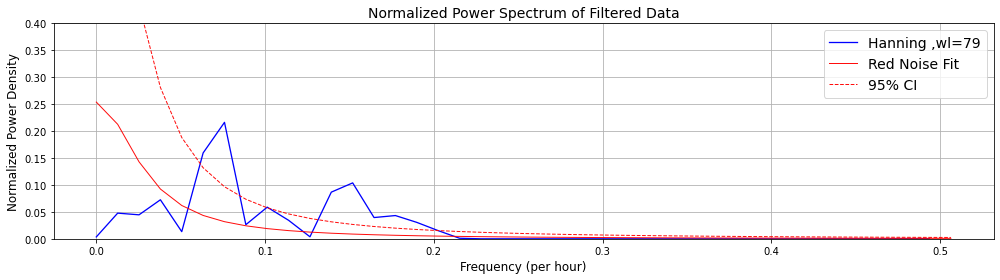

In [44]:
### compare to red noise using filtered data
rho,lag1 = stats.pearsonr(y[0:len(y)-1],y[1:len(y)])
Te = -1./np.log(rho) # After Hartmann 6.4 with delta t = 1
print('lag-1 autocorrelation=',round(rho,2),'and Te =',round(Te,2),'hours')
print('   ')

# get power spectra
window_length=len(y)
T2 = window_length/2
freq_w = np.arange(0.,T2+1.)/window_length
P_welch = sig.welch(y,window='hanning',nperseg=window_length);
P_welch_n = P_welch[1]/np.sum(P_welch[1])  #normalize

## Construct the expected rednoise spectrum - functions
## Need to update the 95% confidence interval
alpha = 0.95
red_fit_n_welch = create_normalized_redfit(window_length,Te)  ## generate red_fit_n using window_length
dof_welch=len(y)/(window_length/2)  ### Barnes Eq. 26
f_bounds_welch = create_f_bounds(alpha,dof_welch,red_fit_n_welch)  ## f-test for variance; 

## plot
fig = plt.figure(figsize=(14,4))
plt.xlabel('Frequency (per hour)',fontsize=12)
plt.ylabel('Normalized Power Density',fontsize=12)
plt.grid()
plt.plot(freq_w[0:40],P_welch_n, color='blue', lw=1.3, label='Hanning ,wl='+str(window_length));
plt.plot(freq_w,red_fit_n_welch, color='red', lw=1, alpha=0.95, label='Red Noise Fit');
plt.plot(freq_w,f_bounds_welch, color='red', lw=1, ls='--', alpha=0.95, label=str(int(alpha*100))+'% CI');
plt.title("Normalized Power Spectrum of Filtered Data",fontsize=14);
plt.legend(loc='upper right',fontsize=14)
plt.ylim(0,0.4)
fig.tight_layout()